In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


#import csv and change column names
columns = ['ID', 'A2','A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']
df = pd.read_csv('C:/Users/Dayton Jennings/Documents/IU Graduate School/Python/Final Project/wisconsinbreastcancer.txt',sep = ',', names=columns)
df['A7']=df['A7'].replace('?',np.NaN)

#convert back to numeric
df['A7'] = pd.to_numeric(df['A7'], errors='coerce')

#•Report how many NaN.
countNaN=df['A7'].isnull().sum()


#change values of NaN to mean
df['A7'] = df['A7'].fillna((df['A7'].mean()))

df = df.astype(int)

In [4]:
#use only columns A2-A10
df1=df.drop(["ID","CLASS"],axis=1)
df1.head()

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [5]:
#import KMeans - use sklearn.cluster create KMeans model for n_cluster = 4

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

#fit model to your data
km.fit(df1)
x=km.fit_predict(df1)
print(x)

[0 2 0 1 0 3 0 0 0 0 0 0 0 0 3 1 0 0 2 0 2 1 0 1 0 2 0 0 0 0 0 0 1 0 0 0 1
 0 2 2 1 1 3 1 1 0 2 0 0 1 1 0 1 3 2 1 1 1 2 1 1 0 1 1 0 1 0 2 3 0 0 1 0 2
 1 0 0 0 0 0 0 0 0 0 3 1 2 3 0 0 0 0 0 0 0 0 0 0 1 3 1 0 0 0 3 0 2 3 0 2 0
 2 2 3 0 0 0 3 0 0 0 0 3 2 3 0 2 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 3 0 2 1 0 0 2 0 0 0 3 2 0 0 0 0 0 3 1 0 0 0 0 0 3 2 3 0 1 0 2 0 0 0 3 2
 0 3 3 3 0 3 3 0 0 0 0 2 0 0 0 3 2 0 0 0 3 1 0 0 0 3 3 0 3 3 1 0 0 1 0 0 3
 0 2 2 0 2 1 0 3 2 3 1 2 0 0 3 1 3 2 0 0 0 0 0 0 3 2 0 0 0 2 2 3 1 2 0 0 0
 2 2 3 3 2 1 0 2 2 1 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 3 3 0 1 3 0 0 1 2 0 2
 1 0 0 2 1 0 3 0 2 2 0 0 1 0 0 0 1 0 0 1 2 3 0 2 2 0 0 2 0 0 2 0 1 2 2 0 0
 2 2 0 2 0 0 2 2 0 0 0 3 0 0 0 1 2 0 0 1 3 0 0 0 3 1 2 3 2 0 0 0 0 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 2 0 0 0 0 3 0 0 0 3 0 1 0 0 0 0 0 0 2 2 1 0 0 0 2 0 0 0
 0 0 0 0 0 3 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 3 3 0 0 0 3 1 0 0 2 0 

In [6]:
#calculate centroids

centroids = km.cluster_centers_

#print centroids 
print(centroids)


[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.33700441
  2.06167401 1.20044053 1.07709251]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.42253521
  5.38028169 6.81690141 2.30985915]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]]


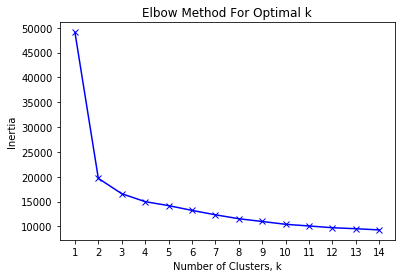

The elbow point is at 2, so the optimal number of clusters is 2.


In [7]:
#create a range from 1 to 15 or more
ks = range(1, 15)

#create an empty list for inertias values 
inertias = []

#use for loop to calculate KMeans for each values
for k in ks:
    km = KMeans(n_clusters=k)
    km=km.fit(df1)
    inertias.append(km.inertia_)
     

# Plot ks vs inertias
plt.plot(ks, inertias, 'bx-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(ks)
plt.show()

print("The elbow point is at 2, so the optimal number of clusters is 2.")

In [8]:
stat_tab = pd.DataFrame()
#Calc sd and fill
sd_col = (df1.std())
stat_tab['Stan Dev'] = round(sd_col,1)
print(stat_tab)

     Stan Dev
A2        2.8
A3        3.1
A4        3.0
A5        2.9
A6        2.2
A7        3.6
A8        2.4
A9        3.1
A10       1.7


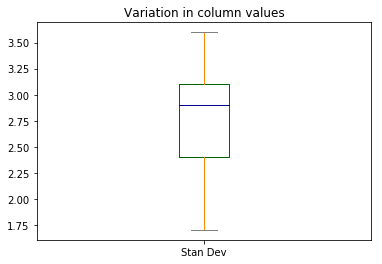

In [9]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
stat_tab.plot(kind='box', color=color, sym='r+',title='Variation in column values')

In [10]:
#import make_pipeline and StandardScalar
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: k
k = KMeans(n_clusters=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, k)

pipeline.fit(df1)
centroids = k.cluster_centers_

print(centroids)

[[ 0.98485132  1.20997804  1.19900927  1.03034277  1.01959796  1.15992736
   1.08677975  1.05909024  0.60768878]
 [-0.49242566 -0.60498902 -0.59950463 -0.51517139 -0.50979898 -0.57996368
  -0.54338987 -0.52954512 -0.30384439]]


Start of Phase 3

In [11]:
#Change iteration to 500 and initial centroids to 20
#Run Kmeans with n_clusters = 2
#Save predicted clusters into a variable labels

km2 = KMeans(n_clusters=2,n_init=20,max_iter=500)
km2.fit(df1)
labels=km2.fit_predict(df1)
print(labels)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

In [12]:
labels[labels > 0] =4
labels[labels < 1] =2
print(labels)

[2 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4
 2 4 4 4 4 4 4 4 2 4 2 2 4 2 2 4 4 4 4 4 2 4 2 4 2 4 2 2 2 2 4 4 2 2 4 2 4
 4 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 4 2 4 4 2 4 2
 4 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2
 2 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4
 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4
 2 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 4 4 4 4 2 2 2
 4 4 4 4 4 4 2 4 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4
 4 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 4 4 4 2 4 4 2 2 4 2 2 4 2 4 4 4 2 2
 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 2 2 2 4 2 2 2
 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2
 2 4 4 2 2 2 4 4 2 2 4 2 

In [13]:
df['KMeans labels'] = labels
df.head(16)

,ID,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS,KMeans labels
0,1000025,5,1,1,1,2,1,3,1,1,2,2
1,1002945,5,4,4,5,7,10,3,2,1,2,4
2,1015425,3,1,1,1,2,2,3,1,1,2,2
3,1016277,6,8,8,1,3,4,3,7,1,2,4
4,1017023,4,1,1,3,2,1,3,1,1,2,2
5,1017122,8,10,10,8,7,10,9,7,1,4,4
6,1018099,1,1,1,1,2,10,3,1,1,2,2
7,1018561,2,1,2,1,2,1,3,1,1,2,2
8,1033078,2,1,1,1,2,1,1,1,5,2,2
9,1033078,4,2,1,1,2,1,2,1,1,2,2


In [30]:
labels_class= df.groupby('KMeans labels')['CLASS'].value_counts()

In [143]:
labels_class

KMeans labels  CLASS
2              2        447
               4         19
4              4        222
               2         11
Name: CLASS, dtype: int64

In [15]:
df['CLASS'].value_counts()

2    458
4    241
Name: CLASS, dtype: int64

In [18]:
df['KMeans labels'].value_counts()

2    466
4    233
Name: KMeans labels, dtype: int64

In [138]:
#Error Rate Function, B for Benign, M for Malign
def ErrorRate(labels,CLASS):
    totlabel4 = 233
    totlabel2 = 466
    totwrong2 = 11
    totwrong4 = 19
    totaldata = 669
    totalLnC = totwrong2 + totwrong4
    Benign_error = (totwrong4 / totlabel2)
    Malign_error = (totwrong2 / totlabel4)
    Total_error = (totalLnC / totaldata)

    return(Benign_error * 100)
    return(Malign_error * 100)
    return(Total_error * 100)
    
print("The error rate for benign: ", Benign_error)
print("The error rate for malign: ", Malign_error)
print("The total error rate: ", Total_error)

The error rate for benign:  4.07725321888412
The error rate for malign:  4.721030042918455
The total error rate:  4.291845493562231


#Report Reflection

Our results from the ErrorRate function we calculated exceeded expectations. They exceeded expectations for two reasons. First, the model we coded could only calculate with manual input and not automatically. Secondly, our error rate calculations for all three categories never exceeded 5%. This translates to a 95% accuracy rating between the real data points in column 'CLASS' and the predictions we calculated from our K-means Clustering predictive model. Our model is not optimal. There could be minor changes in the coding that could improve the efficiency of our model and how we would process the data; however, we were able to formulate a model that was able to predict a 95% accuracy rate. Overall, we would say the model we created throughout the 3 phases was challenging but rewarding. If we did not collaborate together as a group and properly code each phase, our model we would not have been able to succeed in producing low error rates for our final analytical piece of the project.
